Creation of a 2D histogram using hexagonal cells (*hexbin* plot).

In [20]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import gpxpy
from mpl_toolkits.basemap import Basemap

# Data files

We generate a list of GPX files in the selected directory.

In [83]:
gpxdir = "/home/ctroupin/DataOceano/GPX/GranCanaria/*/"
gpxdir = "/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/*/"
gpxdir = "/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/"

In [84]:
gpxlistfile = os.path.join(gpxdir, 'movesAll.text')

In [86]:
gpxlist = []
with open(gpxlistfile) as f:
    gpxfile = f.readline()
    while gpxfile:
        # Use regex to remove shit
        m = re.match(r"\"(\d{4}/\S*\.gpx)\"", gpxfile)
        if m:
            gpxlist.append(m.group(1))
        gpxfile = f.readline()
gpxlist = [os.path.join(gpxdir, gpxfile) for gpxfile in gpxlist]
print(gpxlist)

['/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2013/2013-05-21_13-06-40-80-20269.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2013/2013-11-14_13-02-19-80-20924.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2013/2013-11-05_07-11-00-80-23945.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2013/2013-10-29_13-16-39-80-20693.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2014/2014-05-16_16-08-15-80-7809.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2017/sart-tilman-roche-aux-faucons.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2017/Sart-tilman-golf.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2017/sart-tilman-blanc-gravier.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data/2017/SartTilma_Piste_2017_03_16_12_01_17_Running.gpx', '/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/data

In [87]:
#gpxlist = sorted(glob.glob(os.path.join(gpxdir, '*gpx')))
print(len(gpxlist))

12


# Read data

We use the parser available in [gpxpy](https://pypi.python.org/pypi/gpxpy).<br>
The coordinates are collected in separated lists. We also read the elevation.

In [88]:
lonall, latall, elevationall = [], [], []
for gpxfile in gpxlist:
    with open(gpxfile, 'r') as f:
        gpx_parser = gpxpy.parse(f)

        lon, lat, elevation = [], [], []
        for track in gpx_parser.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lat.append(point.latitude)
                    lon.append(point.longitude)
                    elevation.append(point.elevation)
    lonall.extend(lon)
    latall.extend(lat)
    elevationall.extend(elevation)

We convert the lists to numpy arrays in case we have to do some operations.

In [89]:
x = np.array(lonall)
y = np.array(latall)
z = np.array(elevationall)

In [90]:
len(x)

26610

In [91]:
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
dx = xmax - xmin
dy = ymax - ymin
xmin -= 0 * dx
xmax += 0 * dx
ymin -= 0 * dy
ymax += 0 * dy

In [92]:
print([ymin, xmin], [ymax, xmax])

[50.551913999999996, 5.5424211569999997] [50.600335100000002, 5.5987344710000002]


# Plots

Define the projection around the region of interest.<br>
We could also use the lon and lat vectors to deduce the domain.

In [93]:
m = Basemap(epsg=4326,
            llcrnrlon=xmin, llcrnrlat=ymin,
            urcrnrlon=xmax, urcrnrlat=ymax,
            lat_ts=.5 * (ymin + ymax), resolution='i')

## Hexbin plot

We project the coordinates using the Basemap we just defined.

In [94]:
xx, yy = m(x, y)

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


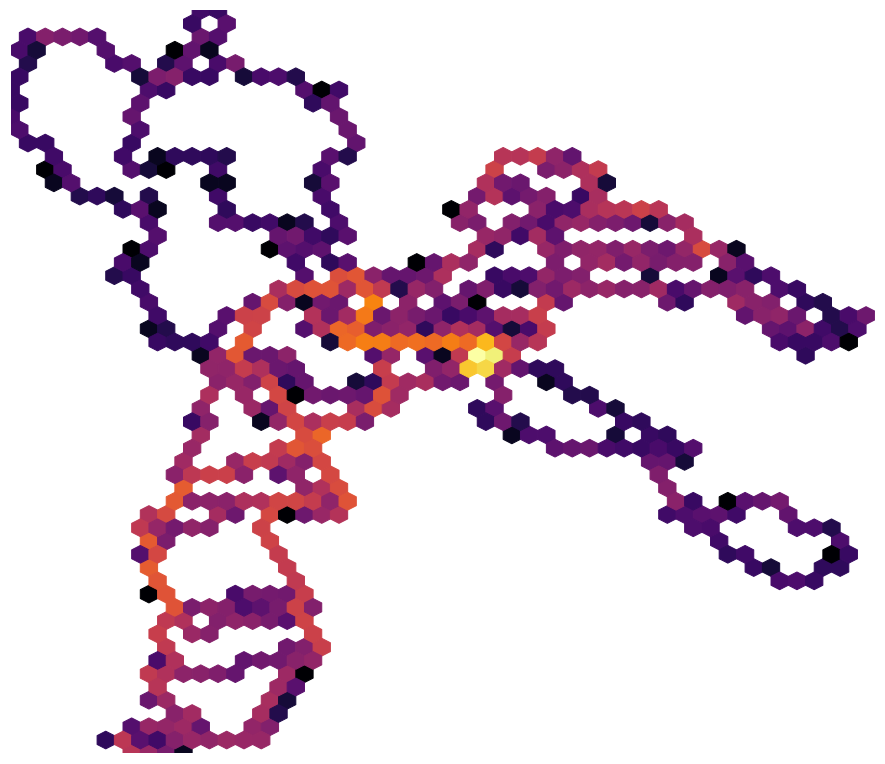

In [99]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
m.drawcoastlines(linewidth=.2)
f1 = plt.gca()
f1.axes.get_xaxis().set_ticks([])
f1.axes.get_yaxis().set_ticks([])
m.hexbin(xx, yy, gridsize=50, mincnt=1, bins='log', cmap='inferno')
#plt.colorbar()
#plt.plot(xx, yy, 'k.')

plt.savefig("/home/ctroupin/Projects/LeafletMaps/Activities/SartTilman/images/SartTilmanHexbin.png",  
            transparent=True, 
            bbox_inches='tight', 
            pad_inches=0)
plt.show()
plt.close()